In [32]:
import copy
from collections import deque
import matplotlib.pyplot as plt
import pandas as pd
import time

# States of India (29)
states = [
    "AP", "AR", "AS", "BR", "CG", "GA", "GJ", "HR", "HP", "JH", "KA", "KL",
    "MP", "MH", "MN", "ML", "MZ", "NL", "OD", "PB", "RJ", "SK", "TN", "TS",
    "TR", "UP", "UK", "WB", "JK"
]

# 4 Colors
colors = ["Red", "Green", "Blue", "Yellow"]
color_map = {"Red": "red", "Green": "green", "Blue": "blue", "Yellow": "yellow"}

# Adjacency list
adjacency = {
    "AP": ["TS", "OD", "TN", "KA"],
    "AR": ["AS", "NL"],
    "AS": ["AR", "NL", "ML", "TR", "MZ", "MN", "WB"],
    "BR": ["UP", "JH", "WB"],
    "CG": ["UP", "JH", "OD", "MH"],
    "GA": ["MH", "KA"],
    "GJ": ["MH", "RJ"],
    "HR": ["PB", "HP", "UK", "RJ"],
    "HP": ["JK", "PB", "HR", "UK"],
    "JH": ["BR", "UP", "CG", "OD", "WB"],
    "KA": ["MH", "AP", "TS", "TN", "KL", "GA"],
    "KL": ["KA", "TN"],
    "MP": ["RJ", "UP", "CG", "MH", "GJ"],
    "MH": ["GJ", "MP", "CG", "TS", "KA", "GA"],
    "MN": ["AS", "MZ", "NL"],
    "ML": ["AS", "TR"],
    "MZ": ["AS", "MN", "TR"],
    "NL": ["AR", "AS", "MN"],
    "OD": ["WB", "JH", "CG", "AP", "TS"],
    "PB": ["JK", "HP", "HR", "RJ"],
    "RJ": ["PB", "HR", "MP", "GJ", "UP"],
    "SK": ["WB"],
    "TN": ["AP", "KA", "KL"],
    "TS": ["MH", "KA", "AP", "OD"],
    "TR": ["AS", "ML", "MZ"],
    "UP": ["UK", "HR", "RJ", "MP", "CG", "JH", "BR"],
    "UK": ["HP", "HR", "UP"],
    "WB": ["BR", "JH", "OD", "AS", "SK"],
    "JK": ["PB", "HP"]
}


def is_valid(state, color, assignment):
    for neighbor in adjacency[state]:
        if neighbor in assignment and assignment[neighbor] == color:
            return False
    return True

In [33]:
# 1. Plain Backtracking

def backtracking(assignment, steps):
    if len(assignment) == len(states):
        return assignment, steps

    var = [s for s in states if s not in assignment][0]
    for color in colors:
        steps[0] += 1
        if is_valid(var, color, assignment):
            assignment[var] = color
            result, steps = backtracking(assignment, steps)
            if result is not None:
                return result, steps
            del assignment[var]
    return None, steps


--- Plain Backtracking ---
Steps: 63 | Time: 0.00021 s


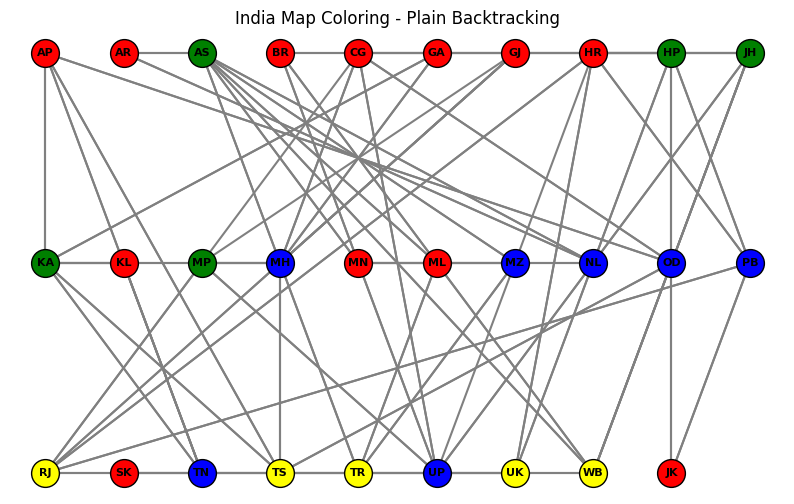

In [34]:
results = []

print("\n--- Plain Backtracking ---")
start = time.time()
solution1, steps1 = backtracking({}, [0])
elapsed1 = time.time() - start
print("Steps:", steps1[0], "| Time:", round(elapsed1, 5), "s")
draw_graph(solution1, "India Map Coloring - Plain Backtracking")
results.append(["Plain Backtracking", steps1[0], elapsed1])

In [35]:
# 2. Backtracking with MRV + LCV

def mrv(assignment, domains):
    unassigned = [v for v in states if v not in assignment]
    return min(unassigned, key=lambda var: len(domains[var]))

def lcv(var, assignment, domains):
    counts = {}
    for color in domains[var]:
        count = 0
        for neighbor in adjacency[var]:
            if neighbor not in assignment and color in domains[neighbor]:
                count += 1
        counts[color] = count
    return sorted(domains[var], key=lambda c: counts[c])

def backtracking_mrv_lcv(assignment, domains, steps):
    if len(assignment) == len(states):
        return assignment, steps

    var = mrv(assignment, domains)
    print(f"MRV chose: {var}, domain: {domains[var]}")
    for color in lcv(var, assignment, domains):
        print(f"Trying {color} for {var}")
        steps[0] += 1
        if is_valid(var, color, assignment):
            assignment[var] = color
            saved_domains = copy.deepcopy(domains)
            for neighbor in adjacency[var]:
                if color in domains[neighbor]:
                    domains[neighbor].remove(color)
            result, steps = backtracking_mrv_lcv(assignment, domains, steps)
            if result is not None:
                return result, steps
            assignment.pop(var)
            domains = saved_domains
    return None, steps




--- Backtracking + MRV + LCV ---
MRV chose: AP, domain: ['Red', 'Green', 'Blue', 'Yellow']
Trying Red for AP
MRV chose: KA, domain: ['Green', 'Blue', 'Yellow']
Trying Green for KA
MRV chose: TN, domain: ['Blue', 'Yellow']
Trying Blue for TN
MRV chose: KL, domain: ['Red', 'Yellow']
Trying Red for KL
MRV chose: TS, domain: ['Blue', 'Yellow']
Trying Blue for TS
MRV chose: MH, domain: ['Red', 'Yellow']
Trying Red for MH
MRV chose: GA, domain: ['Blue', 'Yellow']
Trying Blue for GA
MRV chose: OD, domain: ['Green', 'Yellow']
Trying Green for OD
MRV chose: CG, domain: ['Blue', 'Yellow']
Trying Blue for CG
MRV chose: JH, domain: ['Red', 'Yellow']
Trying Red for JH
MRV chose: UP, domain: ['Green', 'Yellow']
Trying Green for UP
MRV chose: BR, domain: ['Blue', 'Yellow']
Trying Blue for BR
MRV chose: WB, domain: ['Yellow']
Trying Yellow for WB
MRV chose: MP, domain: ['Blue', 'Yellow']
Trying Blue for MP
Trying Yellow for MP
MRV chose: GJ, domain: ['Green', 'Blue']
Trying Green for GJ
MRV chose: RJ

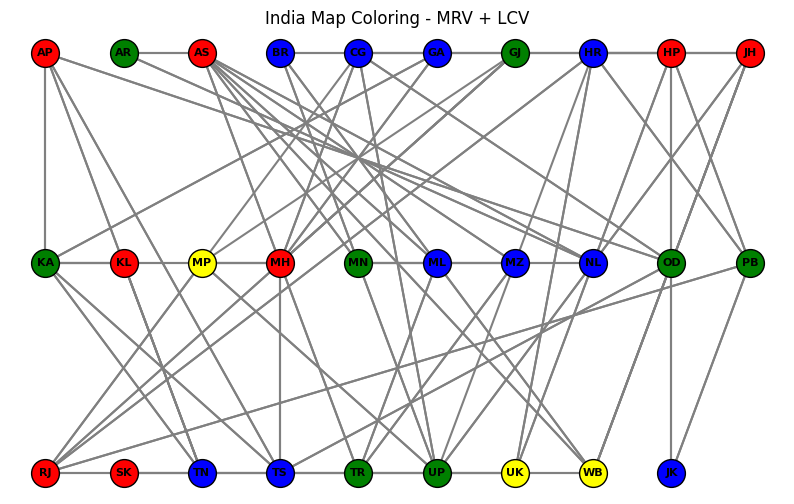

In [36]:
print("\n--- Backtracking + MRV + LCV ---")
domains = {s: colors[:] for s in states}
start = time.time()
solution2, steps2 = backtracking_mrv_lcv({}, domains, [0])
elapsed2 = time.time() - start
print("Steps:", steps2[0], "| Time:", round(elapsed2, 5), "s")
draw_graph(solution2, "India Map Coloring - MRV + LCV")
results.append(["Backtracking + MRV + LCV", steps2[0], elapsed2])

In [37]:
# 3. Backtracking + MRV + LCV + AC-3

def ac3(domains):
    queue = deque([(xi, xj) for xi in states for xj in adjacency[xi]])
    while queue:
        xi, xj = queue.popleft()
        if revise(domains, xi, xj):
            if not domains[xi]:
                return False
            for xk in adjacency[xi]:
                if xk != xj:
                    queue.append((xk, xi))
    return True

def revise(domains, xi, xj):
    revised = False
    for x in domains[xi][:]:
        if all(x == y for y in domains[xj]):
            domains[xi].remove(x)
            revised = True
    return revised

def backtracking_ac3(assignment, domains, steps):
    if len(assignment) == len(states):
        return assignment, steps

    var = mrv(assignment, domains)
    print(f"MRV chose: {var}, domain: {domains[var]}")
    for color in lcv(var, assignment, domains):
        print(f"Trying {color} for {var}")
        steps[0] += 1
        if is_valid(var, color, assignment):
            assignment[var] = color
            saved_domains = copy.deepcopy(domains)
            for neighbor in adjacency[var]:
                if color in domains[neighbor]:
                    domains[neighbor].remove(color)
            if ac3(domains):
                result, steps = backtracking_ac3(assignment, domains, steps)
                if result is not None:
                    return result, steps
            assignment.pop(var)
            domains = saved_domains
    return None, steps


pos = {s: (i % 10, -(i // 10)) for i, s in enumerate(states)}

def draw_graph(solution, title):
    plt.figure(figsize=(10, 6))
    for s in adjacency:
        for n in adjacency[s]:
            x1, y1 = pos[s]
            x2, y2 = pos[n]
            plt.plot([x1, x2], [y1, y2], color="gray", zorder=1)
    for s, (x, y) in pos.items():
        c = color_map[solution[s]]
        plt.scatter(x, y, s=400, c=c, edgecolors="black", zorder=2)
        plt.text(x, y, s, ha="center", va="center", fontsize=8, weight="bold", zorder=3)
    plt.title(title)
    plt.axis("off")
    plt.show()


--- Backtracking + MRV + LCV + AC-3 ---
MRV chose: AP, domain: ['Red', 'Green', 'Blue', 'Yellow']
Trying Red for AP
MRV chose: KA, domain: ['Green', 'Blue', 'Yellow']
Trying Green for KA
MRV chose: TN, domain: ['Blue', 'Yellow']
Trying Blue for TN
MRV chose: KL, domain: ['Red', 'Yellow']
Trying Red for KL
MRV chose: TS, domain: ['Blue', 'Yellow']
Trying Blue for TS
MRV chose: MH, domain: ['Red', 'Yellow']
Trying Red for MH
MRV chose: GA, domain: ['Blue', 'Yellow']
Trying Blue for GA
MRV chose: OD, domain: ['Green', 'Yellow']
Trying Green for OD
MRV chose: CG, domain: ['Blue', 'Yellow']
Trying Blue for CG
MRV chose: JH, domain: ['Red', 'Yellow']
Trying Red for JH
MRV chose: UP, domain: ['Green', 'Yellow']
Trying Green for UP
MRV chose: BR, domain: ['Blue', 'Yellow']
Trying Blue for BR
MRV chose: WB, domain: ['Yellow']
Trying Yellow for WB
MRV chose: MP, domain: ['Blue', 'Yellow']
Trying Blue for MP
Trying Yellow for MP
MRV chose: GJ, domain: ['Green', 'Blue']
Trying Green for GJ
MRV ch

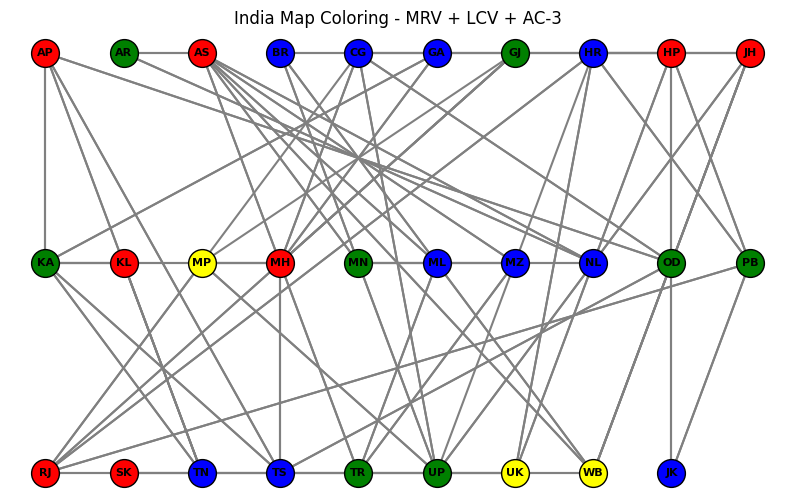

In [38]:
print("\n--- Backtracking + MRV + LCV + AC-3 ---")
domains = {s: colors[:] for s in states}
start = time.time()
solution3, steps3 = backtracking_ac3({}, domains, [0])
elapsed3 = time.time() - start
print("Steps:", steps3[0], "| Time:", round(elapsed3, 5), "s")
draw_graph(solution3, "India Map Coloring - MRV + LCV + AC-3")
results.append(["Backtracking + MRV + LCV + AC-3", steps3[0], elapsed3])

In [39]:
# -----------------------------
# Comparison Table
# -----------------------------
df = pd.DataFrame(results, columns=["Algorithm", "Steps", "Execution Time (s)"])
print("\n--- Efficiency Comparison Table ---")
display(df)


--- Efficiency Comparison Table ---


,Algorithm,Steps,Execution Time (s)
0,Plain Backtracking,63,0.000207
1,Backtracking + MRV + LCV,30,0.006048
2,Backtracking + MRV + LCV + AC-3,30,0.019260


### 1. Plain Backtracking
- **Method**: Tries variables in order, tests all colors sequentially
- **Weakness**: No intelligence in variable/value selection
- **Expected Performance**: Highest step count due to blind search

### 2. Backtracking + MRV + LCV Heuristics
- **MRV (Minimum Remaining Values)**: Selects variable with smallest domain first
  - **Why it works**: Variables with fewer options are more likely to fail early, detecting dead-ends sooner
- **LCV (Least Constraining Value)**: Tries colors that eliminate fewest options for neighbors
  - **Why it works**: Preserves maximum flexibility for future assignments
- **Expected Performance**: Significant reduction in steps compared to plain backtracking

### 3. Backtracking + MRV + LCV + AC-3
- **AC-3 Algorithm**: Maintains arc consistency by removing impossible values
  - **How it works**: Before each assignment, eliminates values that would create conflicts
  - **Benefit**: Reduces domain sizes, making MRV more effective
- **Expected Performance**: Lowest step count due to early constraint propagation

## Why AC-3 Reduces Explored States

1. **Early Failure Detection**: Identifies inconsistent assignments before exploring them
2. **Domain Reduction**: Shrinks variable domains, reducing branching factor
3. **Constraint Propagation**: One assignment triggers cascading eliminations
4. **Prevention of Dead-ends**: Stops invalid paths before wasting computation